# دریافت اطلاعات نمادهای بورس نیویورک به کمک یاهو-فایننس

In [5]:
import pandas as pd
import yfinance as yf       # https://pypi.org/project/yfinance/

## دریافت تاریخچه قیمتی نمادها

اطلاعات مربوط به این هشت سهم را یک جا دریافت می‌کنیم:

اپل، برک‌شایر-هث‌وی، گوگل، اینتل، کوکاکولا، مایکروسافت، تی‌اند‌تی، والمارت

In [3]:
tickers = ['AAPL', 'BRK', 'GOOG', 'INTC', 'KO', 'MSFT', 'T', 'WMT']
data = yf.download(tickers, group_by = 'ticker', start="2017-01-01", end="2022-10-17")

[*********************100%***********************]  8 of 8 completed


متغیر data یک دیتافریم multi-index است که می‌توانیم اطلاعات هر کدام از هشت سهم را جدا کنیم و ببینیم:

In [4]:
data['MSFT'][['Open', 'High', 'Low', 'Close', 'Adj Close']].tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-10-10,233.050003,234.559998,226.729996,229.250000,229.250000
2022-10-11,227.619995,229.059998,224.110001,225.410004,225.410004
2022-10-12,225.399994,227.860001,223.960007,225.750000,225.750000
2022-10-13,219.850006,236.100006,219.130005,234.240005,234.240005
2022-10-14,235.539993,237.240005,228.339996,228.559998,228.559998


<AxesSubplot:title={'center':'Adj Close for MSFT'}, xlabel='Date'>

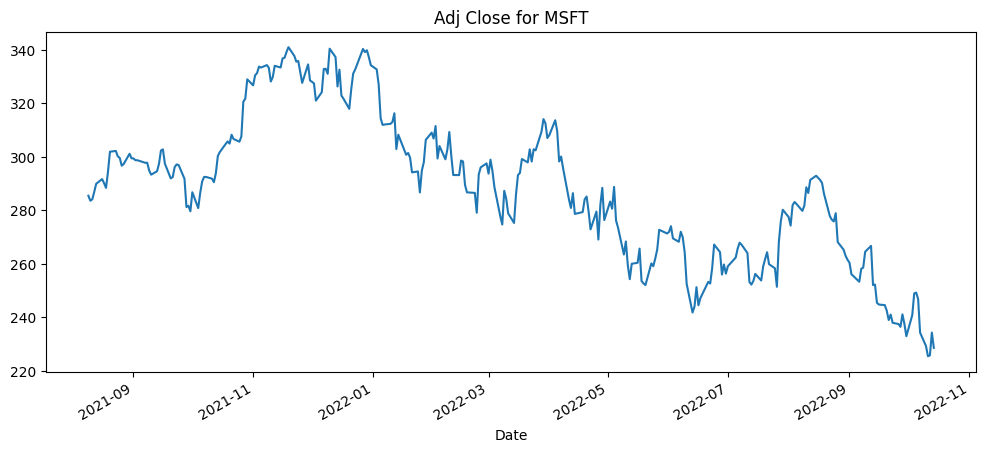

In [24]:
data['MSFT', 'Adj Close'][-300:].plot(title='Adj Close for MSFT', figsize=(12,5))

### نوشتن خروجی در فایل اکسل در شیت‌های جداگانه

برای نوشتن در خروجی، ابتدا اسم فایل و فولدر مربوطه را انتخاب می‌کنیم. سپس در صورت موجود نبودن فولدر، آن را می‌سازیم.

خروجی این مرحله در این مقصد ذخیره می‌شود:
./excel_files/01_NYSE_prices.xlsx

In [5]:
import os

dir_name = 'excel_files'
os.makedirs(rf"./{dir_name}", exist_ok=True)
output_file_name = '01_NYSE_prices'
path = rf"./{dir_name}/{output_file_name}.xlsx"

در یک حلقه for هر کدام از سهم‌ها را در شیت جداگانه‌ای می‌نویسیم.

In [6]:
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
for col in data.columns.levels[0].tolist():
    data[col].to_excel(writer, sheet_name = col)
writer.save()

## دریافت اطلاعات ترازنامه‌ نمادها

ابتدا یک تابع برای نشان دادن پروگرس دریافت ترازنامه‌ها تعریف می‌کنیم.

In [7]:
def progressBar(current, total, barLength = 20):
    percent = float(current) * 100 / total
    arrow   = '=' * int(percent/100 * barLength - 1) + '>'
    spaces  = ' ' * (barLength - len(arrow))

    print('Progress: [%s%s] %d %%' % (arrow, spaces, percent), end='\r')

در این مرحله، تک به تک ترازنامه هر کدام از شرکت‌ها دریافت شده و در یک شیت جداگانه نوشته می‌شود. در صورت بروز خطا برای یک نماد، حلقه متوقف نمی‌شود و فقط پیامی در خروجی چاپ می‌شود.

خروجی این مرحله در این مقصد ذخیره می‌شود:
./excel_files/01_NYSE_balance_sheets.xlsx

In [8]:
output_file_name = '01_NYSE_balance_sheets'
path = rf"./{dir_name}/{output_file_name}.xlsx"
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

progressBar(0, len(tickers))
for i, ticker in enumerate(tickers):
    try:
        df_balance_sheet = yf.Ticker(ticker).balance_sheet
        df_balance_sheet.to_excel(writer, sheet_name=ticker)
        progressBar(i+1, len(tickers))
    except:
        print(f"failed to fetch the balance_sheet of '{ticker}'")
writer.save()

نمونه ترازنامه دریافت شده (ترازنامه والمارت):

In [10]:
df_balance_sheet.head()

,2022-01-31,2021-01-31,2020-01-31,2019-01-31
Intangible Assets,4.800000e+09,4.900000e+09,5.200000e+09,5.800000e+09
Capital Surplus,4.839000e+09,3.646000e+09,3.247000e+09,2.965000e+09
Total Liab,1.529690e+11,1.649650e+11,1.549430e+11,1.396610e+11
Total Stockholder Equity,8.325300e+10,8.092500e+10,7.466900e+10,7.249600e+10
Minority Interest,8.638000e+09,6.606000e+09,6.883000e+09,7.138000e+09
